<a href="https://colab.research.google.com/github/mnagaku/digraj202103/blob/master/paper.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

# 書籍「ゲームメカニクス大全」のパターン・ランゲージ化に向けて

長久勝（[ライフマティックス株式会社](https://lifematics.co.jp/)）　  
小野憲史（[東京国際工科専門職大学](https://www.iput.ac.jp/tokyo)）　  
滝川陽一  
德岡正肇（[アトリエサード](http://www.a-third.com/top.html)）　  
長久佑  

### 概要
[『ゲームメカニクス大全』](https://www.shoeisha.co.jp/book/detail/9784798164731)はボードゲームのメカニクスのパターン集である。筆者らは、ここに記されたパターン間の参照に注目し、パターン・ランゲージの構築を試みた。まず、グラフ構造のネットワーク分析によりカテゴリ（対象書籍においては章）の中心性を確認した。次に、中心性の高いカテゴリを中心に、パターンに見られる親子関係を抽出した。さらに、同時に使われるパターンのネットワークについても分析した。これらの結果をパターン記述にフィードバックすることで、パターン間の関連がより分かりやすくなり、パターン・ランゲージが構築できる。

### キーワード
ゲームデザイン, パターン, ネットワーク分析

## はじめに

　『ゲームメカニクス大全』（以下、本書）はボードゲームのメカニクスのパターン集である。ここで言う「パターン」とは、クリストファー・アレグザンダーに起源を持つ設計のカタログ化手法を指す。ソフトウェア開発の分野では「デザインパターン」として知られており、本書の謝辞にデザインパターンを提唱した[『オブジェクト指向における再利用のためのデザインパターン』](https://www.sbcr.jp/product/4797311126/)について「ジェフにデザインコンセプトをどのように分解して再構築できるかを示した」と述べられていることから、本書が「パターン」集であることが分かる。

　パターンの記述において特徴的な要素の一つに、パターン間の参照がある。これにより、パターン集は単なるパターンのリストではなく、ネットワーク構造を持つことになり、パターン集が対象とするドメインの知識体系となる。例えば「このパターンとあのパターンは同時に使うとより効果的である」、「このパターンとあのパターンは同時に使うことができない」、「このパターンはあのパターンを特定の状況で効果的に使えるよう改変した亜種である」といった知識が表現できる。パターン間の参照を効果的に用いて対象ドメインの知識体系に昇華したパターン集を「パターン・ランゲージ」と呼ぶ。

　パターン・ランゲージを念頭に本書を読むと、パターン間の参照について、

1. 本文中で言及のあるパターンのみの参照明記なため、片方向参照が多い。相互の参照性がない
2. 同一カテゴリ（本書においては章）のパターン間に親子関係（このパターンはあのパターンを特定の状況で効果的に使えるよう改変した亜種である）が認められた場合、パターンの参照関係も継承されるのではないか

といった問題意識に至った。つまり、パターン・ランゲージとしては、もっと改善できるとの認識である。こうした観点から本書を分析し、そのフィードバックによりパターン記述を補強することで、本書をより実用的なボードゲームのメカニクスの知識体系へと導きたい。本稿では、その足がかりについて述べる。

## 先行研究

　クリストファー・アレグザンダーが建築分野における253のパターンをまとめた[『パタン・ランゲージ』](https://www.amazon.co.jp/dp/4306041719/)が1977年に出版、GoFがソフトウェア開発分野における23のパターンをまとめた『オブジェクト指向における再利用のためのデザインパターン』が1994年に出版、ヒルサイドグループが主催するソフトウェア開発分野におけるパターンの会議[「Pattern Languages of Programs」](https://www.hillside.net/index.php/past-plop-conferences)が1994年から開催、とパターンに関する研究蓄積には相当の厚みがある。

　パターン・ランゲージの近年の潮流として、パターン・ランゲージの全体像を示す「パターンマップ」が挙げられる。例えば、[「Scrum Patterns Summary」](https://sites.google.com/a/scrumorgpatterns.com/www/scrumpatternssummary)には、2008年にパターンマップを描いたことが記されている。パターンの関係が視覚化されると、人間がパターン・ランゲージの全体像を把握するのに役立つ。パターンマップはノードとエッジによるグラフで表現されることが多いが、エッジに持たせる意味は規格化されていないため、読み取る際には注意が必要である。

　一般的に、パターンに関する活動では、パターンの種を抽出するマイニングから始めて、パターン・ランゲージの構築を目指す。例えば、ゲーム開発者を対象にワークショップ形式でのパターン・マイニングの事例[(a)](https://www.slideshare.net/mnagaku/ss-15940999)[(b)](http://cedec.cesa.or.jp/2016/session/ENG/8709.html)がある。本研究は、既にパターンが収集された成果物を前提としており、特殊なアプローチとなっている。

## 本研究における取り組み

### 片方向参照の解消

　本書のパターン記述では「関連する項目」に他のパターンへの参照を明記している。しかし、既に述べたように相互参照が完備ではない。これを解消するために、本書からパターンの参照情報を抜き出してデータ化し、このデータを処理して、グラフを表現する隣接行列を正規化した。この隣接行列によって情報としては相互参照が実現される。

　データ表現には[Graphviz](https://graphviz.org/)のdot形式を採用した。個々のパターンをノードとして定義し、カテゴリでグループ化した。本書から抜き出した参照情報を、そのままエッジとして定義した。

In [1]:
res = ! ! ls gamemech.dot
if "No such file or directory" in res[0]:
    !wget https://raw.githubusercontent.com/mnagaku/digraj202103/main/gamemech.dot
else:
    print("既にあるのでgithubからダウンロードしません")

既にあるのでgithubからダウンロードしません


In [2]:
!cat gamemech.dot

　作成したデータをレンダリングすることでパターンマップが得られるが、本書内で相互参照されているパターン間ではエッジが二重化されてしまう。これを解消するためにPythonの[PyGraphvizモジュール](https://pygraphviz.github.io/)でグラフ構造を読み込み、隣接行列を対角線で折り返し上三角行列化する正規化処理を施した。処理後のデータは再びdot形式で書き出した。

In [3]:
!sudo apt-get update
!sudo apt-get install -y graphviz libgraphviz-dev

Ign:1 http://repo.mongodb.org/apt/debian stretch/mongodb-org/3.6 InRelease
Hit:2 http://repo.mongodb.org/apt/debian stretch/mongodb-org/3.6 Release       
Hit:4 http://packages.cloud.google.com/apt cloud-sdk InRelease                 
Hit:5 https://packages.cloud.google.com/apt kubernetes-xenial InRelease        
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease     
Get:7 http://security.ubuntu.com/ubuntu focal-security InRelease [109 kB]      
Hit:8 http://archive.ubuntu.com/ubuntu focal InRelease                         
Get:9 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [101 kB]
Fetched 324 kB in 4s (81.6 kB/s)   
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
libgraphviz-dev is already the newest version (2.42.2-3build2).
0 upgraded, 0 n

In [4]:
pip install -U pygraphviz networkx

Requirement already up-to-date: pygraphviz in /opt/conda/lib/python3.8/site-packages (1.7)
Requirement already up-to-date: networkx in /opt/conda/lib/python3.8/site-packages (2.5)
Note: you may need to restart the kernel to use updated packages.


In [5]:
from pygraphviz import *
g = AGraph("gamemech.dot")

In [6]:
nodes = g.nodes()
edges = g.edges()

c = 0
print("正規化前のデータで相互参照されていたパターンの組み合わせ")
for edge in edges:
    if nodes.index(edge[0]) > nodes.index(edge[1]):
        g.delete_edge(edge[0], edge[1])
        if not (edge[1], edge[0]) in edges:
            g.add_edge(edge[1], edge[0])
        else:
            c += 1
            print("("+edge[1]+","+edge[0]+")") # 参照が双方向のものを抽出
print(str(c)+"組")

g.write("gamemech2.dot")

正規化前のデータで相互参照されていたパターンの組み合わせ
(str03,str07)
(trn01,trn04)
(trn07,trn08)
(trn09,trn10)
(trn14,trn16)
(trn10,act08)
(act02,act08)
(res01,res02)
(res07,res08)
(vic01,vic02)
(vic17,vic18)
(vic15,vic19)
(str03,unc04)
(str07,unc04)
(vic08,unc04)
(unc01,unc04)
(eco10,eco11)
(trn09,eco18)
(eco02,eco18)
(vic04,auc08)
(eco17,auc08)
(auc11,auc15)
(auc11,auc16)
(act10,mov12)
(res12,arc02)
(auc11,arc02)
(vic14,set04)
(unc03,car01)
(act02,car06)
(set05,car06)
30組


In [7]:
gamemech2_edges_count = !cat gamemech2.dot | grep "\-\-" | wc -l
print("正規化後のエッジ数 : "+gamemech2_edges_count[0]+"本")

正規化後のエッジ数 : 308本


　正規化後のエッジ数は308本、正規化前のデータで相互参照されていたパターンの組み合わせは30組であった。本書内に明記された相互参照は、全ての参照関係の1割程度しかなかったことになる。

### パターンマップの作成

　正規化済みのdot形式をレンダリングして得られたパターンマップを以下に掲載する。

In [8]:
!dot -Tpng gamemech2.dot -ogamemech2.png
from IPython.display import Image, display_png
display_png(Image("gamemech2.png"))

関係の参照が双方のものは上記出力の通り。

gamemech2.dotに正規化した内容を出力する。

### カテゴリの中心性の確認

　次に、パターン間の関係の種別について分析を進めたいが、親子関係の精査についてはカテゴリ毎の作業となるため、対象とするカテゴリを1つ選びたい。このカテゴリの選出については、筆者らが、メカニクスの中心的なカテゴリについて議論した際に出た「ゲーム終了と勝利」（以下、VIC）を候補として考えた。

　筆者らの議論では、「カードメカニクス」（以下、CAR）などゲームのデザインによっては使われないカテゴリを外し、ゲームの本質が構造ではなくプロセスと考え「ゲームの構造」などを外し、 ゲーム内経済を構成する要素である残ったカテゴリを見た時、要素が構成するパイプラインの最後に位置するVICの重要度が高いと判断した。そもそもゲームは勝ち負けを根本に置いており、直感的にVICが重要という印象とも整合する。

　しかし、筆者らの議論結果を別の角度から補強してくれる材料があれば、より自信を持ってVICを中心的なカテゴリと主張できるため、ネットワーク中心性を確認することとした。

　パターンのネットワークからカテゴリのネットワークを導出し、これに対して2つの中心性指標、PageRankとHITSを計算した。

　パターンのネットワークからカテゴリのネットワークを導出するにあたっては、パターン間のエッジがカテゴリ間に何本存在するかを重み（単純な本数と、存在し得る全ての組み合わせの何割が実際にあるかの、2種類）として採用した場合と、単純にエッジが存在するかどうかだけで作った場合の、2つ（実際には3つ）の方法を試した。しかし、重み付けしたネットワークでは、中心性指標を計算すると、CARの中心性が高いという結果となり、筆者らの議論結果と整合しなかった。パターン間のエッジを詳しく見ると、様々なカテゴリからCARに対して非常に多くのエッジが存在しており、それが原因と考えられた。一方、単純にエッジが存在するかどうかだけで作ったネットワークで中心性指標を計算した結果は以下の計算の通りであり、筆者らの議論結果と概ね整合している。また、カテゴリ間の関係をばねモデルで視覚化したものが以下の図である。

In [9]:
import math

chapters = {}
for node in g.nodes():
    if node[0:3] in chapters:
        chapters[node[0:3]] += 1
    else:
        chapters[node[0:3]] = 1

chapter_edges = {}
for n1 in range(0,len(chapters)-1):
    n1str = list(chapters)[n1]
    for n2 in range(n1+1,len(chapters)):
        n2str = list(chapters)[n2]
        if not n1str in chapter_edges:
            chapter_edges[n1str] = {}
        chapter_edges[n1str].update({n2str:0})

for edge in g.edges():
    if edge[0][0:3] != edge[1][0:3]:
        chapter_edges[edge[0][0:3]][edge[1][0:3]] += 1

chapg1 = AGraph(chapter_edges, splines=True, layout='neato', overlap=False)
chapg2 = AGraph(chapter_edges, splines=True, layout='neato', overlap=False)
chapg3 = AGraph(chapter_edges, splines=True, layout='neato', overlap=False)

for n1 in range(0,len(chapters)-1):
    n1str = list(chapters)[n1]
    n1color = [((int(n1/6)+2)%3)*((int(n1/6)+2)%3+1)*51/2+25, (int(n1/2)%3)*(int(n1/2)%3+1)*51/2+25, (n1%2)*128+64]
    for n2 in range(n1+1,len(chapters)):
        n2str = list(chapters)[n2]
        n2color = [((int(n2/6)+2)%3)*((int(n2/6)+2)%3+1)*51/2+25, (int(n2/2)%3)*(int(n2/2)%3+1)*51/2+25, (n2%2)*128+64]
        if chapter_edges[n1str][n2str] == 0:
            chapg1.delete_edge(n1str,n2str)
            chapg2.delete_edge(n1str,n2str)
            chapg3.delete_edge(n1str,n2str)
        else:
            w1 = chapter_edges[n1str][n2str]
            w2 = w1/(chapters[n1str]*chapters[n2str])
            chapg1.get_edge(n1str,n2str).attr['weight'] = w1
            chapg2.get_edge(n1str,n2str).attr['weight'] = w2
            penwidth = math.sqrt(w2)*50
            chapg1.get_edge(n1str,n2str).attr['penwidth'] = penwidth
            chapg2.get_edge(n1str,n2str).attr['penwidth'] = penwidth
            chapg3.get_edge(n1str,n2str).attr['penwidth'] = penwidth
            color = "#"+format(int((n1color[0]+n2color[0])/2), 'x')\
                +format(int((n1color[1]+n2color[1])/2), 'x')+format(int((n1color[2]+n2color[2])/2), 'x')\
                +format(int(255-w2*2500), 'x')
            chapg1.get_edge(n1str,n2str).attr['color'] = color
            chapg2.get_edge(n1str,n2str).attr['color'] = color
            chapg3.get_edge(n1str,n2str).attr['color'] = color

chapg1.write("chapg1.dot")
chapg2.write("chapg2.dot")
chapg3.write("chapg3.dot")

In [10]:
import networkx as nx
from pprint import pprint

ng = nx.Graph(chapg1)

pr = nx.pagerank_numpy(ng)
pr_sorted = sorted(pr.items(), key=lambda x:x[1], reverse=True)
print("エッジ存在本数で作ったカテゴリNWのPageRank")
pprint(pr_sorted)

エッジ存在本数で作ったカテゴリNWのPageRank
[('act', 0.11607441271804475),
 ('unc', 0.0972011623704828),
 ('trn', 0.09617086566950933),
 ('res', 0.08735716102186734),
 ('eco', 0.08313360471749592),
 ('car', 0.08235562793545115),
 ('vic', 0.07833873896184365),
 ('mov', 0.07010695520952341),
 ('auc', 0.06722929349969083),
 ('arc', 0.06150684816827705),
 ('wpl', 0.057289839289152024),
 ('str', 0.05693662121511843),
 ('set', 0.046298869223543315)]


In [11]:
h,a = nx.hits_numpy(ng)
ht_sorted = sorted(h.items(), key=lambda x:x[1], reverse=True)
print("エッジ存在本数で作ったカテゴリNWのHITS")
pprint(ht_sorted)

エッジ存在本数で作ったカテゴリNWのHITS
[('act', 0.12423950304849958),
 ('trn', 0.10745350585605436),
 ('unc', 0.09772244378607811),
 ('res', 0.08939539289959875),
 ('car', 0.08360436071591743),
 ('eco', 0.07858210098436698),
 ('mov', 0.07240163548635997),
 ('vic', 0.07200201678359737),
 ('auc', 0.06859753858803093),
 ('wpl', 0.06101350739629891),
 ('str', 0.06010834061158156),
 ('arc', 0.05005792773867211),
 ('set', 0.034821726104944085)]


In [12]:
ng = nx.Graph(chapg2)

pr = nx.pagerank_numpy(ng)
pr_sorted = sorted(pr.items(), key=lambda x:x[1], reverse=True)
print("エッジ存在割合で作ったカテゴリNWのPageRank")
pprint(pr_sorted)

エッジ存在割合で作ったカテゴリNWのPageRank
[('car', 0.14717689981213034),
 ('unc', 0.10574034758128491),
 ('set', 0.10280399242424931),
 ('arc', 0.08186366550113403),
 ('act', 0.07658226208542046),
 ('wpl', 0.07430049538869186),
 ('trn', 0.07231459272072795),
 ('eco', 0.06837950882918763),
 ('str', 0.06430314482198941),
 ('auc', 0.05892932419377202),
 ('vic', 0.053833846584474696),
 ('res', 0.05249319375153227),
 ('mov', 0.041278726305405265)]


In [13]:
h,a = nx.hits_numpy(ng)
ht_sorted = sorted(h.items(), key=lambda x:x[1], reverse=True)
print("エッジ存在割合で作ったカテゴリNWのHITS")
pprint(ht_sorted)

エッジ存在割合で作ったカテゴリNWのHITS
[('car', 0.1548781082204156),
 ('unc', 0.1152073205891176),
 ('set', 0.10889268883664407),
 ('eco', 0.07939159202678295),
 ('str', 0.07242228144315528),
 ('trn', 0.07095123263369472),
 ('wpl', 0.07048551141867586),
 ('act', 0.07010266644837405),
 ('arc', 0.06971028717124171),
 ('auc', 0.06643510879373393),
 ('vic', 0.047343748199008294),
 ('res', 0.04240464128857761),
 ('mov', 0.03177481293057843)]


In [14]:
ng = nx.Graph(chapg3)

pr = nx.pagerank_numpy(ng)
pr_sorted = sorted(pr.items(), key=lambda x:x[1], reverse=True)
print("エッジ存在有無で作ったカテゴリNWのPageRank")
pprint(pr_sorted)

エッジ存在有無で作ったカテゴリNWのPageRank
[('trn', 0.08979206751297793),
 ('vic', 0.08978650720865669),
 ('eco', 0.08946237569404224),
 ('res', 0.08257490303090423),
 ('act', 0.08249393623635448),
 ('unc', 0.08248841553202221),
 ('car', 0.0755024368704452),
 ('mov', 0.07507394114807063),
 ('auc', 0.07496824167245861),
 ('wpl', 0.06816447194582076),
 ('set', 0.06810809581216831),
 ('arc', 0.06799646720675732),
 ('str', 0.05358814012932138)]


In [15]:
h,a = nx.hits_numpy(ng)
ht_sorted = sorted(h.items(), key=lambda x:x[1], reverse=True)
print("エッジ存在有無で作ったカテゴリNWのHITS")
pprint(ht_sorted)

エッジ存在有無で作ったカテゴリNWのHITS
[('eco', 0.09079723109138176),
 ('vic', 0.08953806266904635),
 ('trn', 0.0894878835473429),
 ('unc', 0.08303976314842933),
 ('act', 0.08298958402672585),
 ('res', 0.08242407391556122),
 ('auc', 0.07706832512677517),
 ('mov', 0.07629236477245878),
 ('car', 0.07418106893904856),
 ('arc', 0.06776097368572842),
 ('set', 0.06686570802028655),
 ('wpl', 0.06634246557285405),
 ('str', 0.05321249548436118)]


エッジ存在有無で作ったカテゴリNWの視覚化（線の太さでパターン間の存在割合エッジ数を表現）

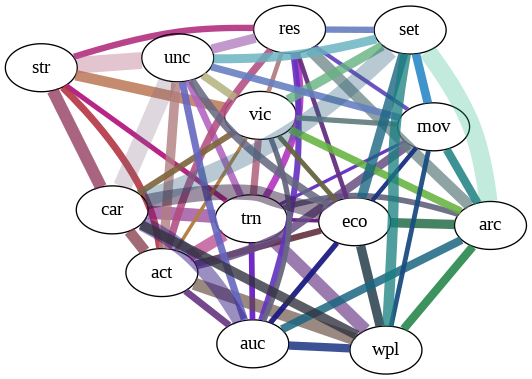

In [16]:
!dot -Tpng chapg3.dot -ochapg3.png
from IPython.display import Image, display_png
display_png(Image("chapg3.png"))

### 親子関係の精査

　まず、VIC内のパターンを読んで表のようにタイプ分類を行った。

| タイプ               | パターン                                        | 
| -------------------- | ----------------------------------------------- | 
| 勝利点増減           | vic01, vic02, vic03, vic04, vic06, vic17, vic20 | 
| かけひき             | vic05, vic18                                    | 
| 勝利条件＋終了条件   | vic07, vic08                                    | 
| 終了条件             | vic09, vic10, vic11, vic12, vic13, vic14, vic15 | 
| 勝利条件             | vic16                                           | 
| 勝利点増減＋終了条件 | vic19                                           | 

In [17]:
label = ""
c = 0
for edge in g.edges():
    if label != edge[0][0:3]:
        if c > 0:
            print(str(c)+"組")
        label = edge[0][0:3]
        print("\n"+label)
        c = 0
    if edge[0].startswith(edge[1][0:3]):
        print(edge)
        c += 1


str
('str02', 'str04')
('str02', 'str05')
('str02', 'str07')
('str03', 'str07')
4組

trn
('trn01', 'trn04')
('trn01', 'trn05')
('trn02', 'trn05')
('trn02', 'trn15')
('trn05', 'trn06')
('trn07', 'trn08')
('trn07', 'trn12')
('trn07', 'trn14')
('trn09', 'trn10')
('trn10', 'trn16')
('trn12', 'trn14')
('trn14', 'trn16')
('trn16', 'trn17')
13組

act
('act01', 'act04')
('act01', 'act10')
('act02', 'act08')
('act02', 'act11')
('act03', 'act11')
('act03', 'act13')
('act04', 'act17')
('act05', 'act11')
('act06', 'act07')
('act06', 'act09')
('act07', 'act08')
('act10', 'act11')
('act12', 'act14')
('act13', 'act14')
('act15', 'act16')
('act15', 'act18')
16組

res
('res01', 'res02')
('res01', 'res05')
('res01', 'res07')
('res01', 'res14')
('res01', 'res18')
('res02', 'res05')
('res02', 'res07')
('res02', 'res13')
('res02', 'res21')
('res03', 'res04')
('res07', 'res08')
('res13', 'res14')
('res18', 'res20')
13組

vic
('vic01', 'vic02')
('vic01', 'vic07')
('vic01', 'vic12')
('vic02', 'vic11')
('vic04', 

　親子関係は同じタイプのパターン間にしか現れないと仮定して、VICのパターン間に付けられた16の参照について検討していく（全ての組み合わせについてまでは今回は検討しない）。但し、「勝利条件＋終了条件」のような複合タイプについては、元となる単純タイプを親に持つことを認めるとする。タイプの違いにより親子関係となり得ないのは、('vic01', 'vic07')、('vic01', 'vic12')、('vic02', 'vic11')、('vic04', 'vic18')、('vic05', 'vic06')、('vic05', 'vic09')、('vic05', 'vic15')、('vic06', 'vic11')、('vic14', 'vic16')、('vic17', 'vic18')、の10組となる。

　残る6組を検討していく。

- ('vic01', 'vic02')：2つの異なる得点方法なので、親子関係ではない。
- ('vic07', 'vic11')：vic11の具体化の1つがvic07と見なせ、親子関係と言える。但し、複合タイプ化される。
- ('vic07', 'vic14')：vic07のレースの表現としてvic14が使われることがある（必ずではない）。レース以外の表現にも使われるため、親子関係ではない。
- ('vic10', 'vic11')：リソースの枯渇を目標として進行する場合もあるが、目標は別でリソースの枯渇でサドンデスの場合もあるので、親子関係ではない。
- ('vic11', 'vic19')：vic19は誰かが勝利に近づくと他のプレイヤは勝利から遠ざかる。vic11は全員が勝利に近づいていく。相反するメカニクスで、親子関係ではない。
- ('vic15', 'vic19')：vic19がvic15として使われる例が挙げられているが、vic19がメインで使われvic15ではない場合も考えられるため、親子関係ではない。

　以上の検討により、VIC内から親子関係('vic11'◁-'vic07')を特定した。

### 参照の継承の確認

　得られた親子関係('vic11'◁-'vic07')について、親の持つ参照を子が継承できているか確認する。
　vic11が持つ参照は6、内の1つは親子関係であるため、確認すべき参照は5となる。以下、順にその関係を確認し、vic11をvic07に置き換えても成立するか検討する。

- ('res10', 'vic11')：スタッキングとvic11を結び付けて言及されている。スタッキングは、vic07の「目標が直感的であり、誰がリードしているかが常に明らかである」と整合を付けやすく、置き換えは成立する。
- ('vic02', 'vic11')：vic02を勝利点獲得、vic11を終了条件とした組み合わせが紹介されている。vic07の「一定の勝利点への到達を目指すゲームは、本質的にレースゲームである」はvic02と整合を付けられるので、置き換えは成立する。
- ('vic06', 'vic11')：vic11単体ではプレイヤに終了を動機付けられないため、vic06で動機付けると述べている。vic07では先頭でゴールすることで勝利が確定するため、vic06がなくとも終了は動機付けられる。また、vic06の効果でvic07が確定させる勝利が影響を受けることもない。置き換えは成立しない。
- ('vic10', 'vic11')：vic10とvic11はゴールに近付いていくという形式上は違いがなく、ポジティブな意味付けかネガティブな意味付けかが違う。vic07もゴールに近付いていくという形式は同じであり、置き換えは成立する。
- ('vic11', 'vic19')：vic11とvic19の違いについて、vic11を「全員が同時に勝利に近付いていく」と述べている。これはvic07にも当てはまるため、置き換えは成立する。

　以上の検討により、参照5つのうち4つについて、参照の継承に問題ないことが分かった。

## 考察

　パターンマップについては、静的な1枚絵で表現できるパターン数を超えていると考えられるため、[「Locomotion Vault」](https://locomotionvault.github.io/)のようにインタラクティブなコンテンツとして表現することを検討できる。

　カテゴリの中心性については、本研究の主題からは外れるが、指標や視覚化で整合した結果を得られており、カテゴリの関係性を把握するのに役立った。

　親子関係の精査の過程においては、vic01とvic07について、「レースのように見えて実際にはそうではない」ものが「vic01に相当」とされ、同時に実装できない関係が見つかった。「このパターンとあのパターンは同時に使うことができない」が実際に確認できた。

　参照の継承の確認では、タイプが完全に同じではない親子関係であったため、勝利条件についての親子の立場の違いから、継承できないものがあった。

　「勝利点増減」タイプのパターンは暗黙的に勝利点による勝利条件を仮定しているため、本来は、「勝利点による勝利判定」パターンが親として存在するのではないかと考えられた。

## さいごに

　一連の作業により、本書の内容を補強する方向性を示せたものと考える。他のカテゴリにも作業を広げる、カテゴリ内の親子関係洗い出しを全組み合わせで行う、親子関係以外の関係についても検討する、といった作業を行い、インタラクティブなコンテンツとして全体像を表現することで、本書のパターン・ランゲージ化が実現されるであろう。

　本研究では、本書内容を所与のものとして、その妥当性を検証することは行っていないが、VIC内のタイプ分類で抽出した「かけひき」がVIC内に配置されることが妥当かには疑問がある。また、参照の意味についても、メカニクスに由来する参照と、タイトル採用実績に由来する参照が混在しているため、分けて記述した上で、メカニクスに由来する参照の網羅性を向上させる必要を感じた。こうした方向でも、取り組みはあり得るだろう。

　メカニクスに由来する参照を考慮すると、パターン間には排他や包含が存在すると考えられるため、ジマーマンが序文で述べた「ランダムに2つのページを開いてもらい、両方のメカニクスを組み合わせたゲームを作成」のアイデアは機能しない場合があるだろう。その場合に、なぜ機能しないのか考察することの教育的な効果は期待できるであろうが。

　本研究で実施したデータ分析については、

https://github.com/mnagaku/digraj202103

にてデータやコードを公開するので、追試研究や派生研究に取り組んでもらえれば幸いである。

## 付録

### 次数

パターンの持つエッジ数。

In [18]:
ng = nx.Graph(g)

dg = nx.degree(ng)
dg_sorted = sorted([(d, n) for n, d in dg], reverse=True)
pprint(dg_sorted)

[(18, 'unc01'),
 (15, 'arc02'),
 (11, 'act02'),
 (10, 'unc04'),
 (10, 'car06'),
 (10, 'auc04'),
 (9, 'str02'),
 (9, 'car05'),
 (8, 'trn10'),
 (8, 'mov02'),
 (8, 'eco05'),
 (8, 'car01'),
 (8, 'auc08'),
 (7, 'wpl08'),
 (7, 'wpl05'),
 (7, 'vic18'),
 (7, 'vic01'),
 (7, 'set04'),
 (7, 'res18'),
 (7, 'eco18'),
 (7, 'eco11'),
 (7, 'auc06'),
 (7, 'auc03'),
 (7, 'act15'),
 (6, 'vic11'),
 (6, 'vic07'),
 (6, 'trn05'),
 (6, 'res02'),
 (6, 'res01'),
 (6, 'auc11'),
 (6, 'arc06'),
 (6, 'act08'),
 (6, 'act06'),
 (6, 'act01'),
 (5, 'wpl06'),
 (5, 'vic14'),
 (5, 'vic06'),
 (5, 'unc02'),
 (5, 'trn16'),
 (5, 'trn09'),
 (5, 'trn07'),
 (5, 'trn02'),
 (5, 'str03'),
 (5, 'set02'),
 (5, 'eco13'),
 (5, 'eco02'),
 (5, 'auc13'),
 (5, 'act03'),
 (4, 'unc10'),
 (4, 'str07'),
 (4, 'str05'),
 (4, 'set05'),
 (4, 'res14'),
 (4, 'res07'),
 (4, 'mov04'),
 (4, 'mov01'),
 (4, 'eco16'),
 (4, 'eco14'),
 (4, 'eco01'),
 (4, 'car04'),
 (4, 'auc09'),
 (4, 'auc07'),
 (4, 'auc05'),
 (4, 'auc02'),
 (4, 'arc08'),
 (4, 'act16'),
 (4,

### PageRank

パターンの中心性を計算。

In [19]:
pr = nx.pagerank(ng)
pr_sorted = sorted(pr.items(), key=lambda x:x[1], reverse=True)
pprint(pr_sorted)

[('unc01', 0.02340117260150655),
 ('arc02', 0.020844095505140128),
 ('eco05', 0.015388844735507926),
 ('act02', 0.01476097498977991),
 ('str02', 0.013799148767806406),
 ('car05', 0.013789292236458616),
 ('unc04', 0.013650861466836453),
 ('car06', 0.013639434291487925),
 ('mov02', 0.013067279892646916),
 ('auc04', 0.012770412154343816),
 ('auc08', 0.011776250841981948),
 ('eco11', 0.011577618563098493),
 ('act15', 0.011396060903393603),
 ('vic18', 0.011180077588921405),
 ('car01', 0.011100201417809952),
 ('wpl05', 0.011028895276045421),
 ('set04', 0.010645350896962603),
 ('trn10', 0.010412737415670139),
 ('vic01', 0.010374233936784872),
 ('wpl08', 0.01012896339978216),
 ('vic11', 0.010074762762540157),
 ('auc06', 0.009918781831078215),
 ('trn07', 0.009398492439256329),
 ('eco18', 0.009297289761807302),
 ('act06', 0.009280114418063605),
 ('res18', 0.009268997500335378),
 ('auc03', 0.009201065982372988),
 ('vic07', 0.009131510682552146),
 ('act01', 0.009108553667508122),
 ('res02', 0.0089

### HITS

パターンの中心性を計算。

In [20]:
(ht, dummy) = nx.hits(ng)
ht_sorted = sorted(ht.items(), key=lambda x:x[1], reverse=True)
pprint(ht_sorted)

[('unc01', 0.04343290701795568),
 ('act02', 0.028616178481053814),
 ('trn10', 0.02551356901275252),
 ('arc02', 0.02388474712074906),
 ('car06', 0.021982427835356692),
 ('auc04', 0.021470682959568617),
 ('car01', 0.020357005037333807),
 ('unc04', 0.020121313093619725),
 ('trn09', 0.017028037484564166),
 ('res18', 0.016396520375309996),
 ('eco18', 0.01545296248386207),
 ('res01', 0.015217775107350031),
 ('eco16', 0.015133757413383622),
 ('wpl08', 0.01453850731165331),
 ('auc03', 0.014143787921054578),
 ('res14', 0.014004893568045164),
 ('auc13', 0.013835588998984528),
 ('auc11', 0.01350736221455511),
 ('trn05', 0.013303622923629603),
 ('auc05', 0.013008703176993498),
 ('auc06', 0.012941087699963646),
 ('auc07', 0.012883997366095268),
 ('act08', 0.012587272347650637),
 ('vic01', 0.012390726941699862),
 ('vic07', 0.012093080214990615),
 ('unc08', 0.011682767629749851),
 ('res08', 0.01142732642449925),
 ('wpl06', 0.011405055526570597),
 ('wpl05', 0.01123828061614407),
 ('unc02', 0.011049482